In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [26]:
df = pd.read_csv('hotels.csv', index_col='id')
df['price_level_num'] = df.price_level.apply(len)
df['rating'] = df.rating.apply(lambda x: 1 if x >= 4.5 else 0)


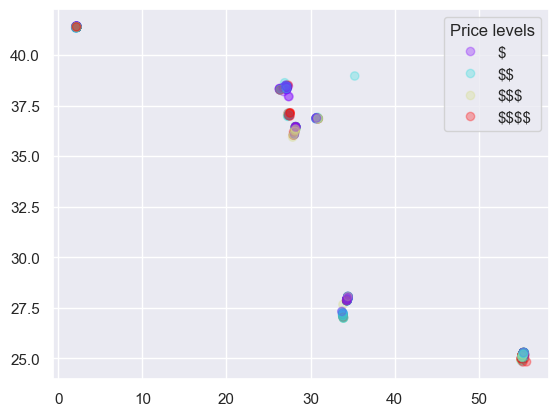

In [14]:
fig, ax = plt.subplots()
scatter = ax.scatter(df['longitude'],df['latitude'],c=df['price_level_num'],cmap='rainbow', alpha=0.3)
handles, labels = scatter.legend_elements()
ax.legend(handles, ["\$", "\$\$", '\$\$\$', '\$\$\$\$'], title="Price levels")
plt.show()

<Axes: xlabel='country', ylabel='price_level_num'>

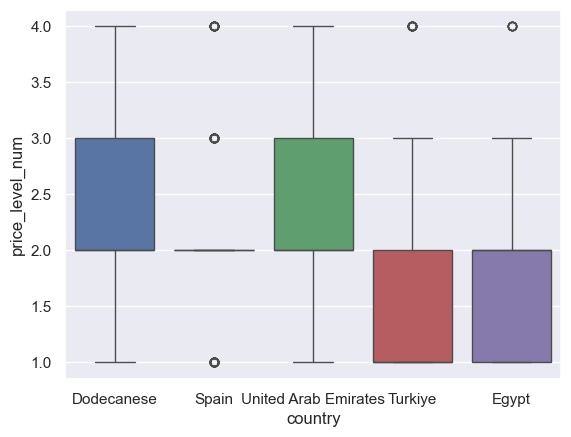

In [15]:
sns.boxplot(df, x='country', y='price_level_num', hue='country')

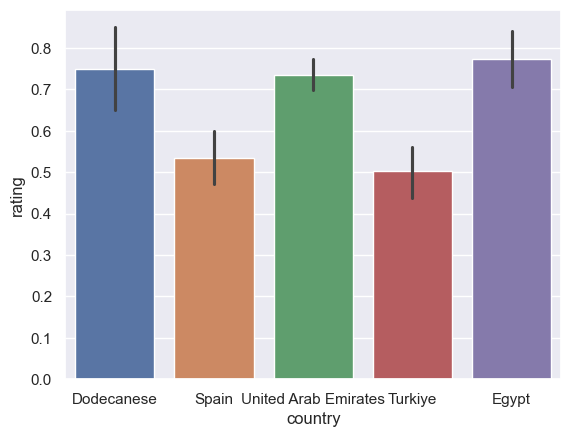

In [27]:
sns.barplot(df, x='country', y='rating', hue='country');

Jak widzimy z wizualizacji podział za krajem ma wartość

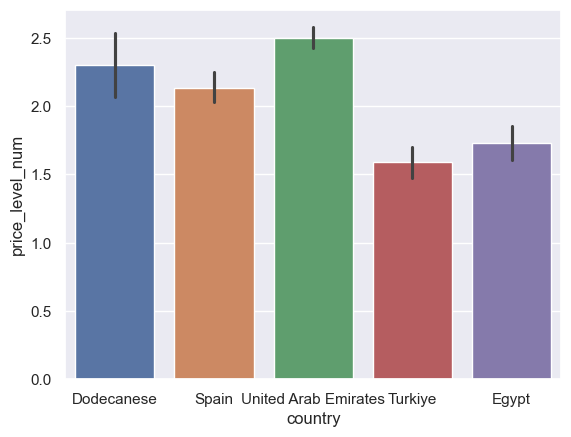

In [16]:
sns.barplot(df, x='country',y='price_level_num', hue='country');

Podobnie mamy z regionem 

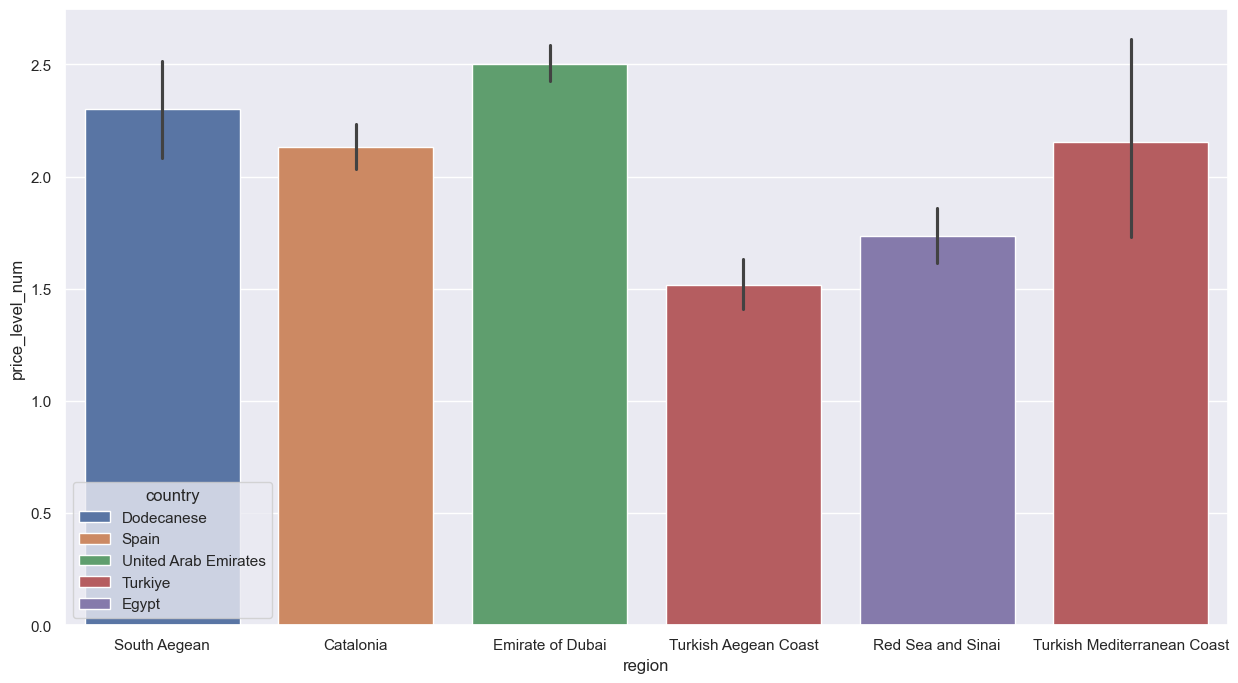

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(df, x='region', y='price_level_num', hue='country',ax=ax)
plt.show()

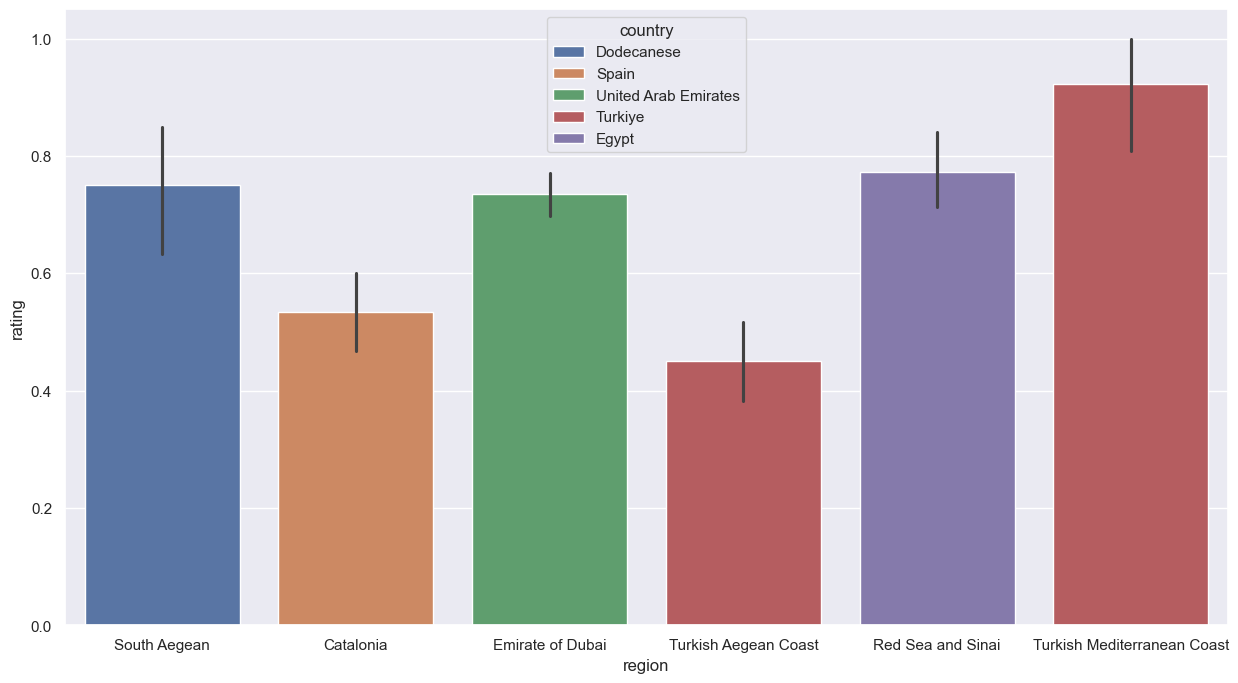

In [29]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(df, x='region', y='rating', hue='country',ax=ax)
plt.show()

Mamy dużo miast, w których jest mało hoteli

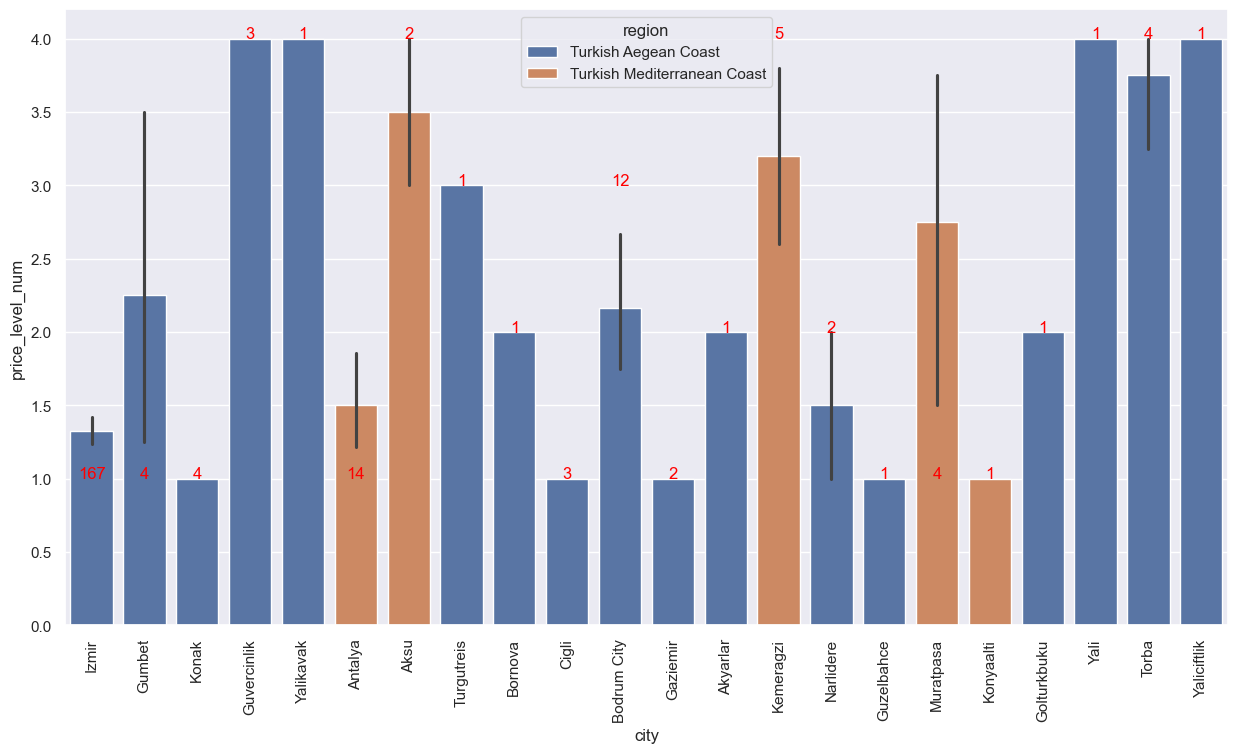

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
cities = df[df['country'] == 'Turkiye']
ax = sns.barplot(cities, x='city', y='price_level_num', hue='region',ax=ax)
plt.xticks(rotation=90)
groupedvalues = cities.groupby('city').count().reset_index()
for index, row in groupedvalues.iterrows():
    ax.text(row.city, cities[cities['city'] == row.city].price_level_num.iloc[0] , row.price_level_num, color='red', ha='center')
plt.show()

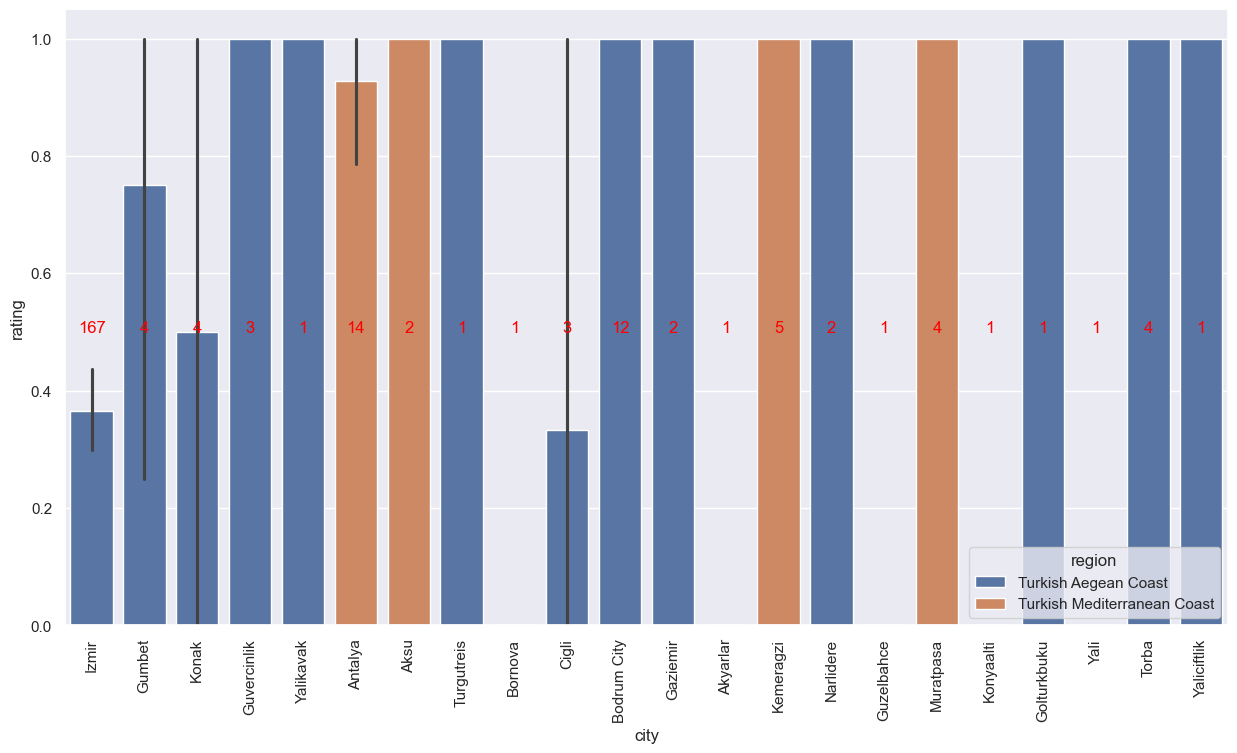

In [32]:
fig, ax = plt.subplots(figsize=(15,8))
cities = df[df['country'] == 'Turkiye']
ax = sns.barplot(cities, x='city', y='rating', hue='region',ax=ax)
plt.xticks(rotation=90)
groupedvalues = cities.groupby('city').count().reset_index()
for index, row in groupedvalues.iterrows():
    ax.text(row.city, 0.5 , row.rating, color='red', ha='center')
plt.show()

<Axes: xlabel='rating', ylabel='Count'>

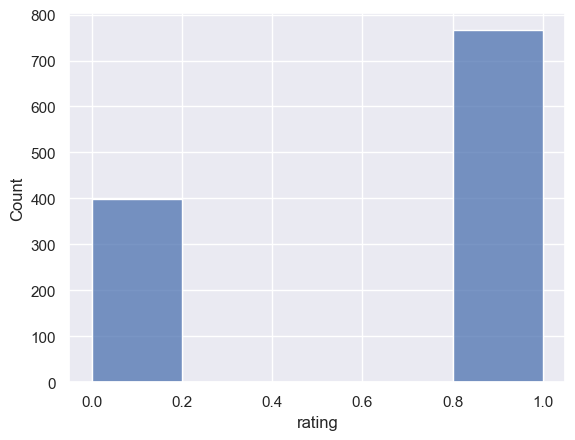

In [28]:
sns.histplot(df, x='rating', bins=5)